#### Loading the libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Loading the image as grayscale

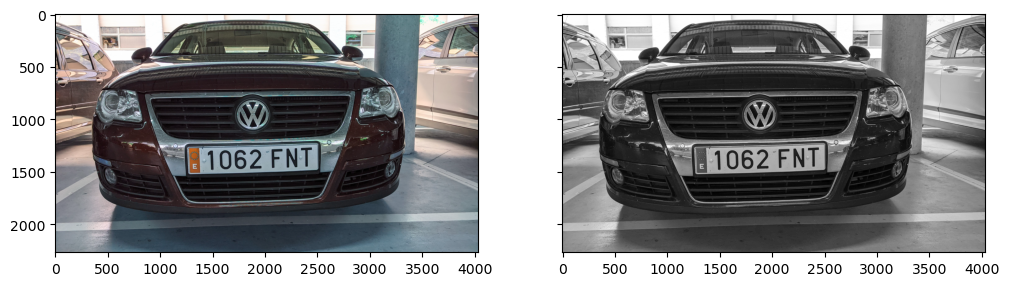

In [3]:
image_path = "C:/Users/ainav/OneDrive/Documents/Uni/3rd_year/1st_semester/vision&learning/challenge1/Licence-Plates-Challenge/Test/Test/Frontal/Frontal/1062FNT.jpg"
im = cv2.imread(image_path)
HASAN_KARAN_TRANSFORMATION_COEFFS = [0.114, 0.587, 0.299] #Special Grayscale Transformation
m = np.array(HASAN_KARAN_TRANSFORMATION_COEFFS).reshape((1,3))
grayscale_image = cv2.transform(im, m)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(im)
ax2.imshow(grayscale_image, cmap= 'gray')

#### Blurring the image

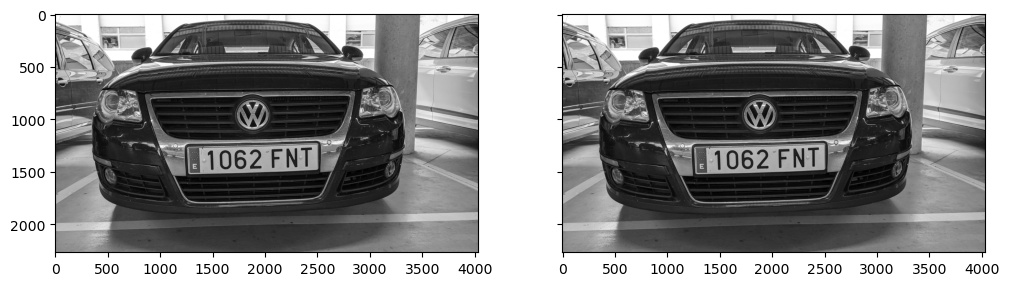

In [4]:
median_image = cv2.medianBlur(grayscale_image, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(grayscale_image, cmap= 'gray')
ax2.imshow(median_image, cmap= 'gray')

#### Applying blackhat operation

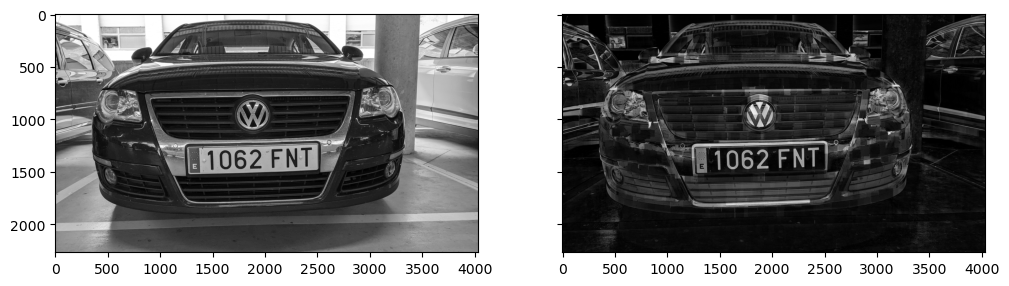

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (60, 60))
blackhat_im = cv2.morphologyEx(grayscale_image, cv2.MORPH_BLACKHAT, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(grayscale_image,  cmap = 'gray')
ax2.imshow(blackhat_im, cmap = 'gray')

#### Binarize blackat image

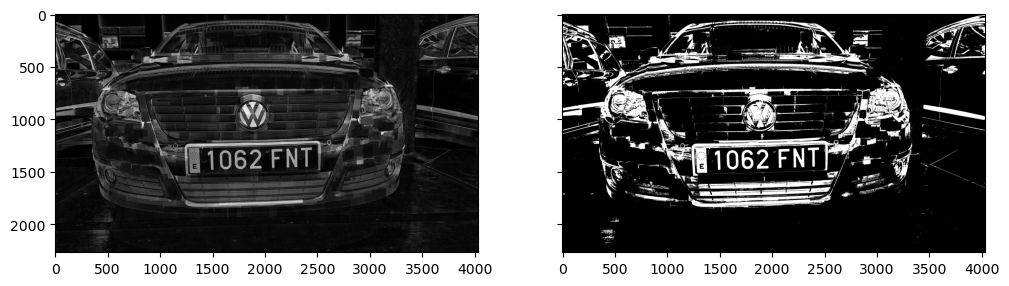

In [37]:
ret2,binary_blackhat = cv2.threshold(blackhat_im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(blackhat_im, cmap= 'gray')
ax2.imshow(binary_blackhat, cmap= 'gray')


#### Doing some operations to enhance the plate 

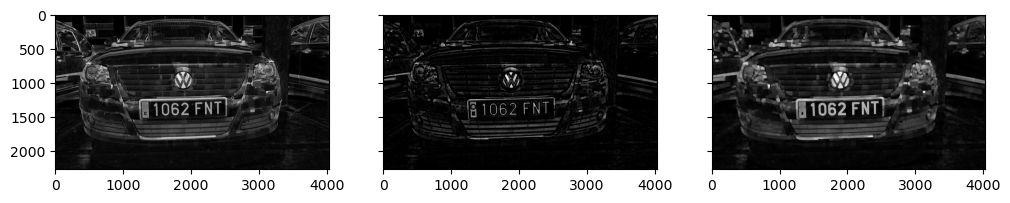

In [38]:
# Define kernel size
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)

# Apply morphological operations
image_eroded = cv2.erode(blackhat_im, kernel, iterations=3)
image_dilated = cv2.dilate(image_eroded, kernel, iterations=5)

# Display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(blackhat_im, cmap= 'gray')
ax2.imshow(image_eroded, cmap= 'gray')
ax3.imshow(image_dilated, cmap= 'gray')

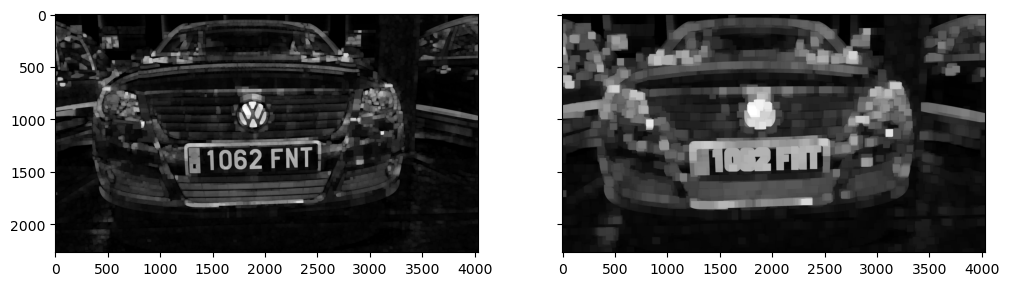

In [61]:
kernel = np.ones((5, 5), np.uint8)
super_dilated = cv2.dilate(image_dilated, kernel, iterations = 10)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(super_dilated, cmap= 'gray')

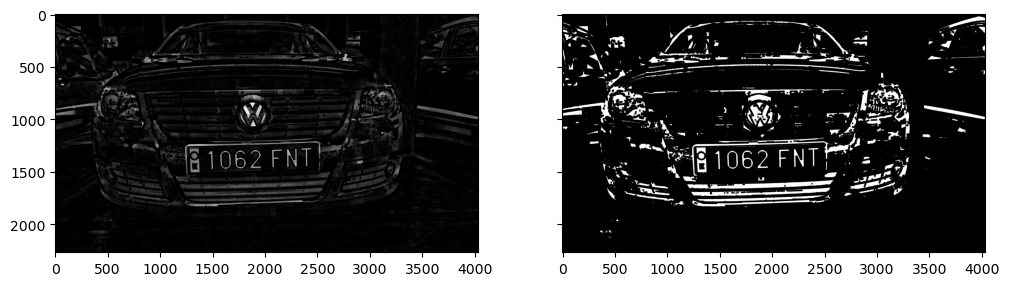

In [62]:
# BINARIZE ERODED IMAGE

ret2,binary_eroded = cv2.threshold(image_eroded,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_eroded, cmap= 'gray')
ax2.imshow(binary_eroded, cmap= 'gray')

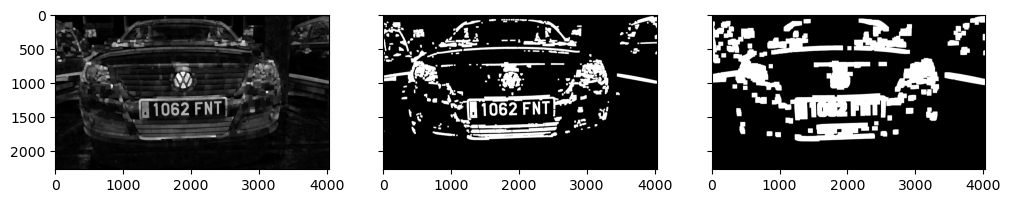

In [63]:
# BINARIZE DILATED IMAGE and SUPER-DILATED IMAGE

ret2,binary_dilated = cv2.threshold(image_dilated,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,binary_superdilated = cv2.threshold(super_dilated,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(binary_dilated, cmap= 'gray')
ax3.imshow(binary_superdilated, cmap='gray')

##### operations with binary erode image

##### operations with dilated binary image

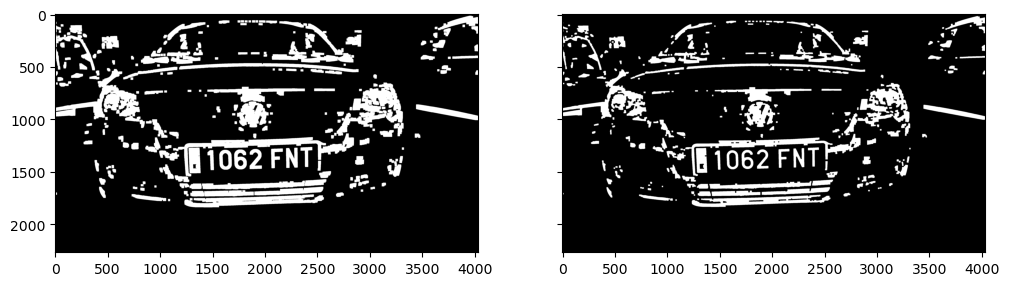

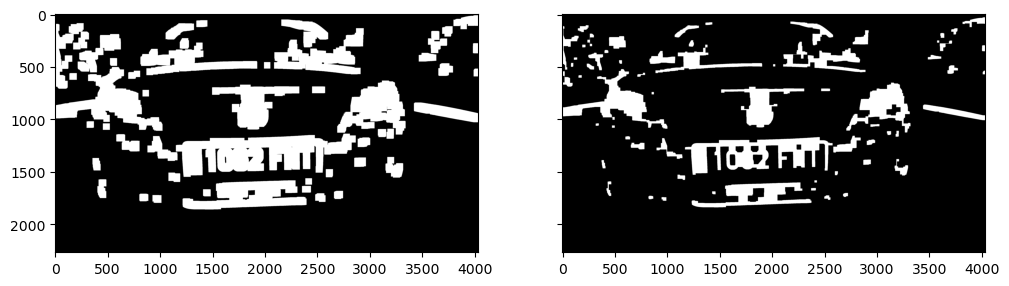

In [65]:
# trying close after erode
op1 = cv2.erode(binary_dilated, kernel, iterations = 2)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(binary_dilated, cmap= 'gray')
ax2.imshow(op1, cmap= 'gray')


op2 = cv2.erode(binary_superdilated, kernel, iterations = 10)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(binary_superdilated, cmap= 'gray')
ax2.imshow(op2, cmap= 'gray')